In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6

In [23]:
data=pd.read_excel('shampoo_sales.xls')
print("Shape of dataset :",data.shape)
data

Shape of dataset : (36, 2)


,Month,Sales
0,0001-01,266.0
1,0001-02,145.9
2,0001-03,183.1
3,0001-04,119.3
4,0001-05,180.3
5,0001-06,168.5
6,0001-07,231.8
7,0001-08,224.5
8,0001-09,192.8
9,0001-10,122.9


In [24]:
data.dtypes

Month     object
Sales    float64
dtype: object

In [55]:
#data=data.drop('Month',axis=0)
#data.head()

In [25]:
#making it a time series data
#dateparse=lambda dates:pd.datetime.strptime(dates,'%Y-%m')    
#data=pd.read_excel('shampoo_sales.xls',parse_dates=['Month'],index_col='Month',date_parser=dateparse)
#data.head()

In [26]:
data.index

RangeIndex(start=0, stop=36, step=1)

In [27]:
ts=data['Sales']
ts.head()

0    266.0
1    145.9
2    183.1
3    119.3
4    180.3
Name: Sales, dtype: float64

**A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
Most of the Time Series models work on the assumption that the Time Series is stationary. Intuitively, we can sat that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.
That is why it is important to check the stationarity of a time series.** 

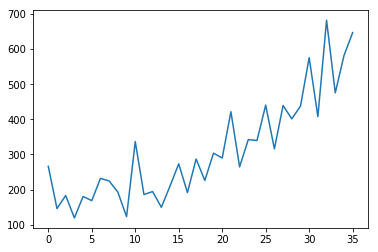

In [32]:
plt.plot(ts)

In [33]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean=pd.DataFrame.rolling(timeseries,window=6).mean()   #6 months rolling statistics
    rolstd=pd.DataFrame.rolling(timeseries,window=6).std()
    
    #Plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    print ('Results of Dickey-Fuller Test :')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','#Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print (dfoutput)

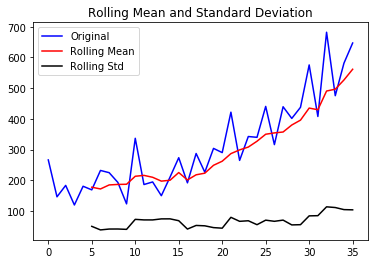

Results of Dickey-Fuller Test :
Test Statistic           3.060142
p-value                  1.000000
#Lags used              10.000000
#Observations used      25.000000
Critical value (1%)     -3.723863
Critical value (5%)     -2.986489
Critical value (10%)    -2.632800
dtype: float64


In [34]:
test_stationarity(ts)

**Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series.
Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values.**



#  How to make a time series stationary?

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

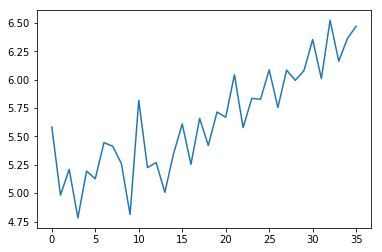

In [31]:
# Estimating and eliminating trend

ts_log=np.log(ts) 
plt.plot(ts_log)

For better understanding of trend, we do smoothing of time series.

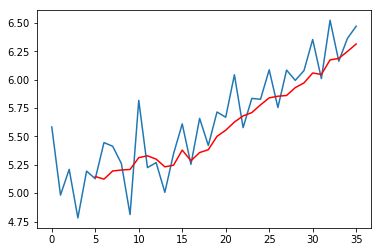

In [37]:
#Moving Average
moving_avg=pd.DataFrame.rolling(ts_log,6).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [39]:
ts_log_movingavg_diff=ts_log-moving_avg
ts_log_movingavg_diff

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5    -0.019672
6     0.322204
7     0.218379
8     0.057553
9    -0.397684
10    0.505547
11   -0.104221
12   -0.030615
13   -0.224959
14    0.101007
15    0.230793
16   -0.031372
17    0.301365
18    0.037230
19    0.214336
20    0.114503
21    0.416776
22   -0.103353
23    0.125126
24    0.049580
25    0.247205
26   -0.099367
27    0.223535
28    0.063584
29    0.108863
30    0.295391
31   -0.036662
32    0.349814
33   -0.024397
34    0.115164
35    0.156865
Name: Sales, dtype: float64

Lets drop these NaN values and check the plots to test stationarity.

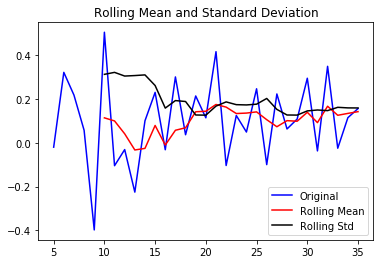

Results of Dickey-Fuller Test :
Test Statistic         -8.533922e+00
p-value                 1.020060e-13
#Lags used              0.000000e+00
#Observations used      3.000000e+01
Critical value (1%)    -3.669920e+00
Critical value (5%)    -2.964071e+00
Critical value (10%)   -2.621171e+00
dtype: float64


In [40]:
ts_log_movingavg_diff.dropna(inplace=True)
test_stationarity(ts_log_movingavg_diff)

# Eliminating Trend and Seasonality

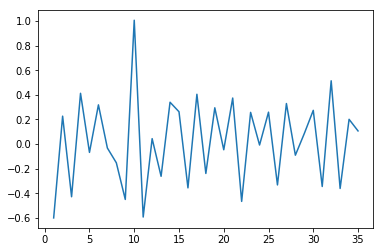

In [43]:
#Differencing
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

This appears to have reduced trend considerably. Lets verify using our plots:


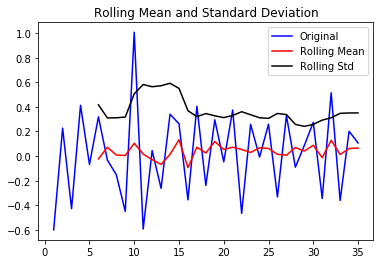

Results of Dickey-Fuller Test :
Test Statistic          -2.168202
p-value                  0.217988
#Lags used              10.000000
#Observations used      24.000000
Critical value (1%)     -3.737709
Critical value (5%)     -2.992216
Critical value (10%)    -2.635747
dtype: float64


In [44]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

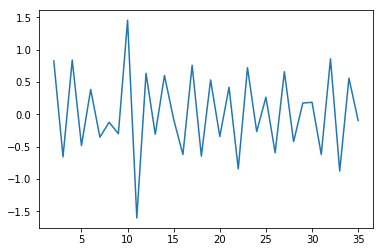

In [45]:
#2nd order differencing
ts_log_diff_2=ts_log_diff-ts_log_diff.shift()
plt.plot(ts_log_diff_2)

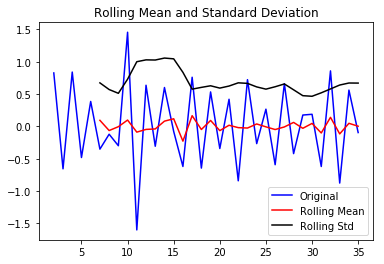

Results of Dickey-Fuller Test :
Test Statistic          -3.796140
p-value                  0.002947
#Lags used              10.000000
#Observations used      23.000000
Critical value (1%)     -3.752928
Critical value (5%)     -2.998500
Critical value (10%)    -2.638967
dtype: float64


In [46]:
ts_log_diff_2.dropna(inplace=True)
test_stationarity(ts_log_diff_2)


# Forecasting a Time Series

The ACF and PACF plots for the time series after differencing can be plotted as:

In [51]:
from statsmodels.tsa.stattools import acf,pacf

In [54]:
lag_acf=acf(ts_log_diff_2,nlags=20)
lag_pacf=pacf(ts_log_diff_2,nlags=20,method='ols')

Text(0.5,1,'Autocorrelation Function')

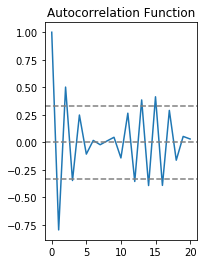

In [66]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

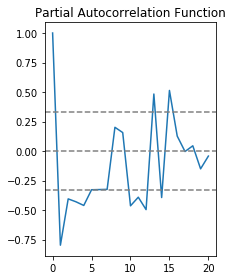

In [67]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [68]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5,1,'RSS: 2.5438')

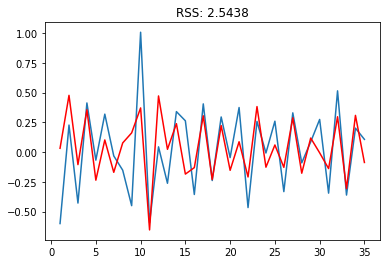

In [69]:
#AR MODEL
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 2.3700')

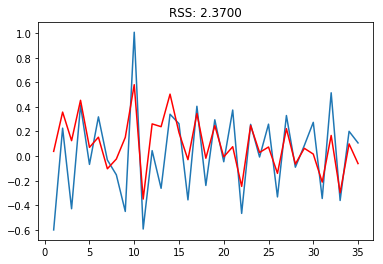

In [70]:
#MA MODEL
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: nan')

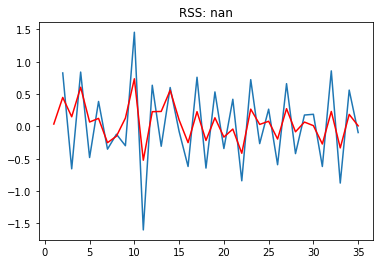

In [71]:
#ARIMA
model = ARIMA(ts_log, order=(1, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff_2)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff_2)**2))


In [84]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

1    0.037293
2    0.484970
3    0.101135
4    0.580283
5   -0.002748
dtype: float64


In [85]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

1    0.037293
2    0.522263
3    0.623399
4    1.203682
5    1.200934
dtype: float64


In [86]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    5.583496
1    5.620790
2    6.105760
3    6.206895
4    6.787178
dtype: float64

Text(0.5,1,'RMSE: 1885.7400')

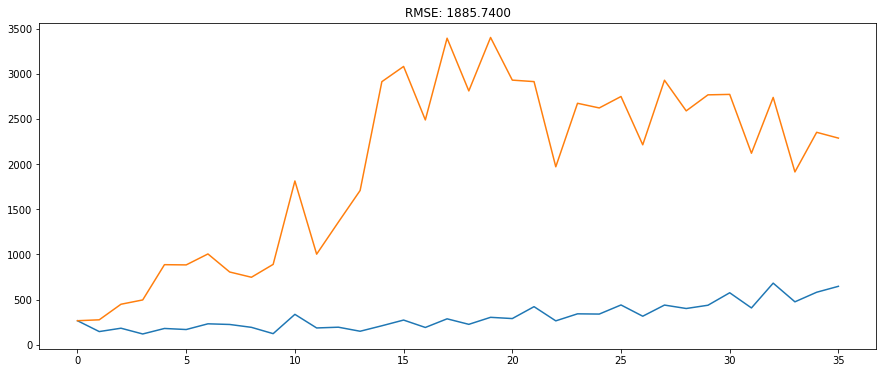

In [87]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))